In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')
from myfunctions_CNN import  EOG_1dcnn_cv
from myfunctions_dataloader import mydataloader_cv
from myfunctions_doubleCNN import EOG_double1dcnn_cv
from myfunctions_LSTM import LSTM_ontop

In [2]:
d = mydataloader_cv()
Fs = 50
root = 'D:/GitHub/TFM/'
d.load_data(path=root+'example_processed_data', K=5, max_n_files=20)

 
There are less files than the provided maximum
shhs1-200001 loaded!
shhs1-200002 loaded!
shhs1-200003 loaded!
shhs1-200004 loaded!
shhs1-200005 loaded!
shhs1-200006 loaded!
shhs1-200007 loaded!
shhs1-200008 loaded!
shhs1-200009 loaded!
shhs1-200010 loaded!
shhs1-200011 loaded!
shhs1-200012 loaded!
shhs1-200013 loaded!
shhs1-200014 loaded!
shhs1-200015 loaded!
shhs1-200016 loaded!
shhs1-200017 loaded!
shhs1-200018 loaded!
shhs1-200019 loaded!
shhs1-200020 loaded!
Validation subjects in fold 0 [ 0  1 15 17]
Validation subjects in fold 1 [ 3  5  8 11]
Validation subjects in fold 2 [ 2 13 16 18]
Validation subjects in fold 3 [ 4  9 12 19]
Validation subjects in fold 4 [ 6  7 10 14]


In [3]:
savepath = root + '02_1DCNN_EOG/trained_models/doubleCNN/doubleCNN_vanilla_adagrad_1e-2/'
doublecnn = EOG_double1dcnn_cv(K=5, mode='vanilla',savepath=savepath, use_GPU=True)
epoch_to_load = 18

Parameters before cleanup 951882
Parameters after cleanup 615173


In [4]:
lr = 5e-4
hidden_size = 500

savepath = root + '06_LSTM_ontop/trained_models/overAdagrad_persubjectagain'
mylstm = LSTM_ontop(doublecnn,epoch_to_load=epoch_to_load,lr=lr,K=5,hidden_size=hidden_size,savepath=savepath) 
# by default, bidirectional, 2 layers, dropout 50%, Xavier initialization

Hidden size: 500
Input features size: 2048
F gate initialized to 1s


# Train

In [6]:
epochs = 100

for k in range(d.K):
    print('##########################################################################################')
    print('          Starting fold %d' %k)
    print('##########################################################################################')
    mylstm.trainloop_persubject(d,k,epochs=epochs,subjects_per_batch=10)
print('DONE!')

##########################################################################################
          Starting fold 0
##########################################################################################
LSTM initial state loaded
CNN loaded
CNN accuracy over validation set: 0.700


C:\Users\Equipo\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1855: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


Epoch 1: 
	Training loss is 6.7315 and accuracy is 0.348.
	Validat  loss is 6.2410 and accuracy is 0.643.
	Validation per-subject mean LSTM acc is 0.643.
	Elapsed time: 11.0 seconds
Epoch 2: 
	Training loss is 6.1907 and accuracy is 0.766.
	Validat  loss is 6.2661 and accuracy is 0.626.
	Validation per-subject mean LSTM acc is 0.626.
	Elapsed time: 11.0 seconds
Epoch 3: 
	Training loss is 6.0808 and accuracy is 0.778.
	Validat  loss is 6.1561 and accuracy is 0.658.
	Validation per-subject mean LSTM acc is 0.658.
	Elapsed time: 10.8 seconds
Epoch 4: 
	Training loss is 6.0090 and accuracy is 0.787.
	Validat  loss is 6.2190 and accuracy is 0.629.
	Validation per-subject mean LSTM acc is 0.629.
	Elapsed time: 10.6 seconds
Epoch 5: 
	Training loss is 5.9921 and accuracy is 0.795.
	Validat  loss is 6.2102 and accuracy is 0.612.
	Validation per-subject mean LSTM acc is 0.612.
	Elapsed time: 11.1 seconds
Epoch 6: 
	Training loss is 5.9584 and accuracy is 0.788.
	Validat  loss is 6.2068 and acc

Epoch 46: 
	Training loss is 5.7575 and accuracy is 0.886.
	Validat  loss is 6.3269 and accuracy is 0.677.
	Validation per-subject mean LSTM acc is 0.677.
	Elapsed time: 10.9 seconds
Epoch 47: 
	Training loss is 5.7583 and accuracy is 0.891.
	Validat  loss is 6.2921 and accuracy is 0.682.
	Validation per-subject mean LSTM acc is 0.682.
	Elapsed time: 10.8 seconds
Epoch 48: 
	Training loss is 5.7493 and accuracy is 0.890.
	Validat  loss is 6.2931 and accuracy is 0.677.
	Validation per-subject mean LSTM acc is 0.677.
	Elapsed time: 10.6 seconds
Epoch 49: 
	Training loss is 5.7490 and accuracy is 0.888.
	Validat  loss is 6.3243 and accuracy is 0.689.
	Validation per-subject mean LSTM acc is 0.689.
	Elapsed time: 10.8 seconds
Epoch 50: 
	Training loss is 5.7443 and accuracy is 0.898.
	Validat  loss is 6.3410 and accuracy is 0.683.
	Validation per-subject mean LSTM acc is 0.683.
	Elapsed time: 11.0 seconds
Epoch 51: 
	Training loss is 5.7415 and accuracy is 0.900.
	Validat  loss is 6.2731 a

Epoch 91: 
	Training loss is 5.6613 and accuracy is 0.947.
	Validat  loss is 6.5640 and accuracy is 0.700.
	Validation per-subject mean LSTM acc is 0.700.
	Elapsed time: 11.0 seconds
Epoch 92: 
	Training loss is 5.6651 and accuracy is 0.953.
	Validat  loss is 6.5971 and accuracy is 0.685.
	Validation per-subject mean LSTM acc is 0.685.
	Elapsed time: 11.0 seconds
Epoch 93: 
	Training loss is 5.6607 and accuracy is 0.942.
	Validat  loss is 6.5584 and accuracy is 0.700.
	Validation per-subject mean LSTM acc is 0.700.
	Elapsed time: 11.0 seconds
Epoch 94: 
	Training loss is 5.6594 and accuracy is 0.954.
	Validat  loss is 6.6120 and accuracy is 0.689.
	Validation per-subject mean LSTM acc is 0.689.
	Elapsed time: 11.0 seconds
Epoch 95: 
	Training loss is 5.6595 and accuracy is 0.952.
	Validat  loss is 6.5705 and accuracy is 0.692.
	Validation per-subject mean LSTM acc is 0.692.
	Elapsed time: 10.6 seconds
Epoch 96: 
	Training loss is 5.6575 and accuracy is 0.952.
	Validat  loss is 6.5503 a

Epoch 35: 
	Training loss is 5.8211 and accuracy is 0.841.
	Validat  loss is 6.1751 and accuracy is 0.734.
	Validation per-subject mean LSTM acc is 0.734.
	Elapsed time: 10.9 seconds
Epoch 36: 
	Training loss is 5.8251 and accuracy is 0.846.
	Validat  loss is 6.2311 and accuracy is 0.722.
	Validation per-subject mean LSTM acc is 0.722.
	Elapsed time: 10.9 seconds
Epoch 37: 
	Training loss is 5.8162 and accuracy is 0.843.
	Validat  loss is 6.2219 and accuracy is 0.726.
	Validation per-subject mean LSTM acc is 0.726.
	Elapsed time: 11.0 seconds
Epoch 38: 
	Training loss is 5.8224 and accuracy is 0.837.
	Validat  loss is 6.2200 and accuracy is 0.724.
	Validation per-subject mean LSTM acc is 0.724.
	Elapsed time: 11.1 seconds
Epoch 39: 
	Training loss is 5.8145 and accuracy is 0.845.
	Validat  loss is 6.2063 and accuracy is 0.730.
	Validation per-subject mean LSTM acc is 0.730.
	Elapsed time: 11.0 seconds
Epoch 40: 
	Training loss is 5.8201 and accuracy is 0.844.
	Validat  loss is 6.2498 a

Epoch 80: 
	Training loss is 5.7155 and accuracy is 0.898.
	Validat  loss is 6.4046 and accuracy is 0.719.
	Validation per-subject mean LSTM acc is 0.719.
	Elapsed time: 11.0 seconds
Epoch 81: 
	Training loss is 5.7124 and accuracy is 0.907.
	Validat  loss is 6.3731 and accuracy is 0.735.
	Validation per-subject mean LSTM acc is 0.735.
	Elapsed time: 11.0 seconds
Epoch 82: 
	Training loss is 5.7120 and accuracy is 0.905.
	Validat  loss is 6.3836 and accuracy is 0.727.
	Validation per-subject mean LSTM acc is 0.727.
	Elapsed time: 11.0 seconds
Epoch 83: 
	Training loss is 5.7051 and accuracy is 0.906.
	Validat  loss is 6.4330 and accuracy is 0.715.
	Validation per-subject mean LSTM acc is 0.715.
	Elapsed time: 10.6 seconds
Epoch 84: 
	Training loss is 5.7051 and accuracy is 0.906.
	Validat  loss is 6.4164 and accuracy is 0.727.
	Validation per-subject mean LSTM acc is 0.727.
	Elapsed time: 10.9 seconds
Epoch 85: 
	Training loss is 5.7025 and accuracy is 0.913.
	Validat  loss is 6.4439 a

Epoch 24: 
	Training loss is 5.8569 and accuracy is 0.818.
	Validat  loss is 6.2652 and accuracy is 0.708.
	Validation per-subject mean LSTM acc is 0.708.
	Elapsed time: 11.0 seconds
Epoch 25: 
	Training loss is 5.8486 and accuracy is 0.820.
	Validat  loss is 6.2031 and accuracy is 0.730.
	Validation per-subject mean LSTM acc is 0.730.
	Elapsed time: 10.6 seconds
Epoch 26: 
	Training loss is 5.8490 and accuracy is 0.817.
	Validat  loss is 6.2434 and accuracy is 0.721.
	Validation per-subject mean LSTM acc is 0.721.
	Elapsed time: 10.9 seconds
Epoch 27: 
	Training loss is 5.8407 and accuracy is 0.822.
	Validat  loss is 6.2876 and accuracy is 0.719.
	Validation per-subject mean LSTM acc is 0.719.
	Elapsed time: 11.0 seconds
Epoch 28: 
	Training loss is 5.8404 and accuracy is 0.821.
	Validat  loss is 6.2435 and accuracy is 0.735.
	Validation per-subject mean LSTM acc is 0.735.
	Elapsed time: 11.0 seconds
Epoch 29: 
	Training loss is 5.8337 and accuracy is 0.828.
	Validat  loss is 6.3151 a

Epoch 69: 
	Training loss is 5.7523 and accuracy is 0.875.
	Validat  loss is 6.3754 and accuracy is 0.730.
	Validation per-subject mean LSTM acc is 0.730.
	Elapsed time: 10.9 seconds
Epoch 70: 
	Training loss is 5.7431 and accuracy is 0.878.
	Validat  loss is 6.4204 and accuracy is 0.710.
	Validation per-subject mean LSTM acc is 0.710.
	Elapsed time: 11.0 seconds
Epoch 71: 
	Training loss is 5.7392 and accuracy is 0.876.
	Validat  loss is 6.4034 and accuracy is 0.723.
	Validation per-subject mean LSTM acc is 0.723.
	Elapsed time: 11.0 seconds
Epoch 72: 
	Training loss is 5.7330 and accuracy is 0.881.
	Validat  loss is 6.3892 and accuracy is 0.725.
	Validation per-subject mean LSTM acc is 0.725.
	Elapsed time: 11.0 seconds
Epoch 73: 
	Training loss is 5.7280 and accuracy is 0.880.
	Validat  loss is 6.4001 and accuracy is 0.717.
	Validation per-subject mean LSTM acc is 0.717.
	Elapsed time: 10.6 seconds
Epoch 74: 
	Training loss is 5.7264 and accuracy is 0.880.
	Validat  loss is 6.4197 a

Epoch 13: 
	Training loss is 5.9287 and accuracy is 0.778.
	Validat  loss is 6.1367 and accuracy is 0.700.
	Validation per-subject mean LSTM acc is 0.700.
	Elapsed time: 10.6 seconds
Epoch 14: 
	Training loss is 5.9238 and accuracy is 0.779.
	Validat  loss is 6.1374 and accuracy is 0.695.
	Validation per-subject mean LSTM acc is 0.695.
	Elapsed time: 11.0 seconds
Epoch 15: 
	Training loss is 5.9166 and accuracy is 0.785.
	Validat  loss is 6.1162 and accuracy is 0.720.
	Validation per-subject mean LSTM acc is 0.720.
	Elapsed time: 11.0 seconds
Epoch 16: 
	Training loss is 5.9160 and accuracy is 0.781.
	Validat  loss is 6.1144 and accuracy is 0.726.
	Validation per-subject mean LSTM acc is 0.726.
	Elapsed time: 11.0 seconds
Epoch 17: 
	Training loss is 5.9052 and accuracy is 0.794.
	Validat  loss is 6.1227 and accuracy is 0.726.
	Validation per-subject mean LSTM acc is 0.726.
	Elapsed time: 11.0 seconds
Epoch 18: 
	Training loss is 5.8987 and accuracy is 0.801.
	Validat  loss is 6.1111 a

Epoch 58: 
	Training loss is 5.7941 and accuracy is 0.845.
	Validat  loss is 6.2247 and accuracy is 0.736.
	Validation per-subject mean LSTM acc is 0.736.
	Elapsed time: 11.0 seconds
Epoch 59: 
	Training loss is 5.7892 and accuracy is 0.844.
	Validat  loss is 6.2203 and accuracy is 0.740.
	Validation per-subject mean LSTM acc is 0.740.
	Elapsed time: 11.2 seconds
Epoch 60: 
	Training loss is 5.7823 and accuracy is 0.849.
	Validat  loss is 6.2481 and accuracy is 0.725.
	Validation per-subject mean LSTM acc is 0.725.
	Elapsed time: 10.9 seconds
Epoch 61: 
	Training loss is 5.7788 and accuracy is 0.850.
	Validat  loss is 6.2274 and accuracy is 0.739.
	Validation per-subject mean LSTM acc is 0.739.
	Elapsed time: 10.6 seconds
Epoch 62: 
	Training loss is 5.7779 and accuracy is 0.851.
	Validat  loss is 6.2534 and accuracy is 0.729.
	Validation per-subject mean LSTM acc is 0.729.
	Elapsed time: 10.7 seconds
Epoch 63: 
	Training loss is 5.7726 and accuracy is 0.857.
	Validat  loss is 6.2355 a

Epoch 2: 
	Training loss is 6.4531 and accuracy is 0.732.
	Validat  loss is 6.3561 and accuracy is 0.712.
	Validation per-subject mean LSTM acc is 0.712.
	Elapsed time: 11.0 seconds
Epoch 3: 
	Training loss is 6.2073 and accuracy is 0.739.
	Validat  loss is 6.2951 and accuracy is 0.680.
	Validation per-subject mean LSTM acc is 0.680.
	Elapsed time: 11.1 seconds
Epoch 4: 
	Training loss is 6.1057 and accuracy is 0.741.
	Validat  loss is 6.3268 and accuracy is 0.672.
	Validation per-subject mean LSTM acc is 0.672.
	Elapsed time: 11.0 seconds
Epoch 5: 
	Training loss is 6.0491 and accuracy is 0.746.
	Validat  loss is 6.3492 and accuracy is 0.666.
	Validation per-subject mean LSTM acc is 0.666.
	Elapsed time: 10.6 seconds
Epoch 6: 
	Training loss is 6.0121 and accuracy is 0.754.
	Validat  loss is 6.2142 and accuracy is 0.709.
	Validation per-subject mean LSTM acc is 0.709.
	Elapsed time: 10.8 seconds
Epoch 7: 
	Training loss is 5.9947 and accuracy is 0.750.
	Validat  loss is 6.1955 and acc

Epoch 47: 
	Training loss is 5.8052 and accuracy is 0.847.
	Validat  loss is 6.2789 and accuracy is 0.725.
	Validation per-subject mean LSTM acc is 0.725.
	Elapsed time: 11.1 seconds
Epoch 48: 
	Training loss is 5.8042 and accuracy is 0.847.
	Validat  loss is 6.3901 and accuracy is 0.715.
	Validation per-subject mean LSTM acc is 0.715.
	Elapsed time: 10.7 seconds
Epoch 49: 
	Training loss is 5.7997 and accuracy is 0.848.
	Validat  loss is 6.3227 and accuracy is 0.721.
	Validation per-subject mean LSTM acc is 0.721.
	Elapsed time: 10.9 seconds
Epoch 50: 
	Training loss is 5.7945 and accuracy is 0.850.
	Validat  loss is 6.3368 and accuracy is 0.721.
	Validation per-subject mean LSTM acc is 0.721.
	Elapsed time: 11.1 seconds
Epoch 51: 
	Training loss is 5.7935 and accuracy is 0.851.
	Validat  loss is 6.4031 and accuracy is 0.715.
	Validation per-subject mean LSTM acc is 0.715.
	Elapsed time: 11.0 seconds
Epoch 52: 
	Training loss is 5.7904 and accuracy is 0.854.
	Validat  loss is 6.3343 a

Epoch 92: 
	Training loss is 5.7020 and accuracy is 0.904.
	Validat  loss is 6.6577 and accuracy is 0.725.
	Validation per-subject mean LSTM acc is 0.725.
	Elapsed time: 10.5 seconds
Epoch 93: 
	Training loss is 5.7175 and accuracy is 0.902.
	Validat  loss is 6.6251 and accuracy is 0.728.
	Validation per-subject mean LSTM acc is 0.728.
	Elapsed time: 10.7 seconds
Epoch 94: 
	Training loss is 5.7045 and accuracy is 0.902.
	Validat  loss is 6.6472 and accuracy is 0.719.
	Validation per-subject mean LSTM acc is 0.719.
	Elapsed time: 10.9 seconds
Epoch 95: 
	Training loss is 5.7003 and accuracy is 0.906.
	Validat  loss is 6.4837 and accuracy is 0.732.
	Validation per-subject mean LSTM acc is 0.732.
	Elapsed time: 11.0 seconds
Epoch 96: 
	Training loss is 5.7090 and accuracy is 0.906.
	Validat  loss is 6.7420 and accuracy is 0.709.
	Validation per-subject mean LSTM acc is 0.709.
	Elapsed time: 11.0 seconds
Epoch 97: 
	Training loss is 5.7110 and accuracy is 0.906.
	Validat  loss is 6.5862 a

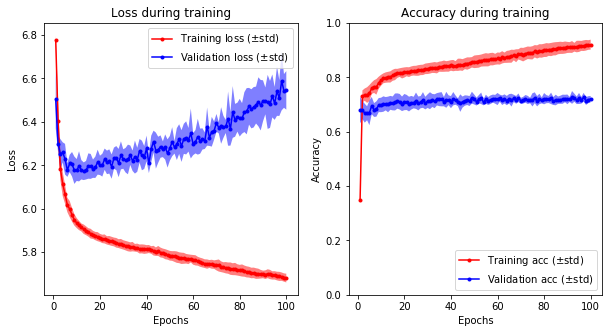

Epoch 96 has the highest validation accuracy (0.727) with validation loss 6.510
Epoch 12 has the lowest validation loss (6.173) with accuracy 0.700. Time taken to train (aprox): 652.9 seconds.


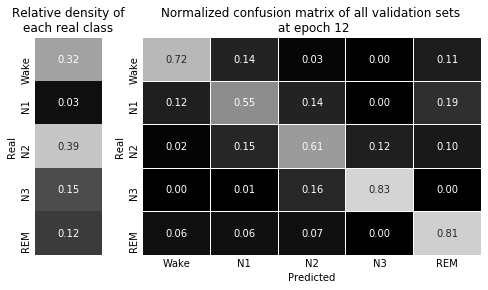

In [7]:
results = mylstm.plot_training_information()

# Plots

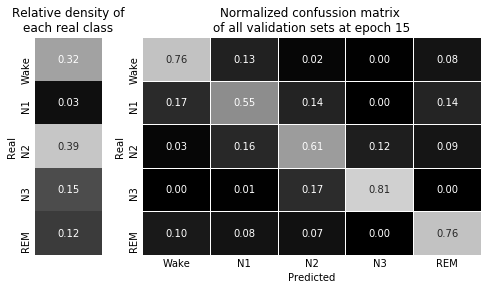

In [9]:
mylstm.plot_cm_at_epoch(15)

The mean validation macro F1 score at epoch 15 is 0.621+-0.031


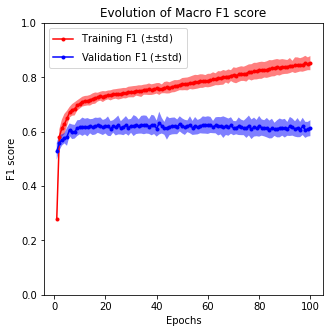

In [16]:
best_epoch = 15
mylstm.plot_f1_score('macro',epoch_to_print=best_epoch)